In [1]:
import os

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torchvision import transforms, models
#from torch.utils.data import DataLoader
#import torchvision.ops.boxes as bops

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

import PIL 
from PIL import Image

import cv2
import time

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [8]:
!nvidia-smi
torch.cuda.is_available()

Mon Mar  3 20:00:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.19                 Driver Version: 561.19         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   60C    P0             13W /   50W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

True

In [11]:
#настроим random_seed всего
seed_num = 13
torch.manual_seed(seed_num)
torch.cuda.manual_seed(seed_num)
torch.cuda.manual_seed_all(seed_num)
torch.use_deterministic_algorithms(True) # do not work in collab
np.random.seed(seed_num)

import torch.backends.cudnn
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True # do not work in collab

In [13]:
project_path = r'F:\Codenrock\Kryptonite'
project_path

'F:\\Codenrock\\Kryptonite'

### Load model
модель была предобучена заранее в рамках другого проекта

In [23]:
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(in_features=512, out_features=10, bias=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [77]:
model.load_state_dict(torch.load(r"C:\Users\serge\DS\Face_recognition\resnet_model_v1_after.pt"))
model.to(device)
model.eval() # prep model for evaluation
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

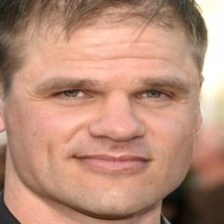

In [45]:
image_path = r'F:\Codenrock\Kryptonite\data\train\images\000000'

image = Image.open(r'F:\Codenrock\Kryptonite\data\train\images\000000\0.jpg')
image

In [61]:
transform = transforms.Compose([
            transforms.Resize((120, 120)), # Resize в квадрат размером 120x120
            transforms.ToTensor(), # картинка из питоновского массива переводится в формат torch.Tensor
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]) # значения пикселей картинки нормализуются
        ])

In [73]:
img_tensor = transform(image)
print(img_tensor.shape)
img_tensor = img_tensor[None,:,:,:]
print(img_tensor.shape)
# print the converted Torch tensor
print(img_tensor)

torch.Size([3, 120, 120])
torch.Size([1, 3, 120, 120])
tensor([[[[-0.6392, -0.6549, -0.6078,  ...,  0.9922,  0.9922,  1.0000],
          [-0.6549, -0.6314, -0.6078,  ...,  0.9843,  0.9922,  0.9922],
          [-0.6392, -0.6392, -0.6941,  ...,  0.9922,  0.9922,  0.9922],
          ...,
          [-0.6706, -0.6549, -0.6314,  ..., -0.5608, -0.5608, -0.5686],
          [-0.6549, -0.6471, -0.6392,  ..., -0.5686, -0.5686, -0.5686],
          [-0.6392, -0.6392, -0.6392,  ..., -0.5686, -0.5686, -0.5686]],

         [[-0.6784, -0.6941, -0.6314,  ...,  1.0000,  1.0000,  1.0000],
          [-0.6941, -0.6627, -0.6314,  ...,  1.0000,  1.0000,  1.0000],
          [-0.6784, -0.6627, -0.7176,  ...,  0.9922,  1.0000,  1.0000],
          ...,
          [-0.6314, -0.6314, -0.6314,  ..., -0.6863, -0.6863, -0.6941],
          [-0.6392, -0.6392, -0.6392,  ..., -0.7020, -0.7098, -0.7098],
          [-0.6392, -0.6392, -0.6314,  ..., -0.7020, -0.7176, -0.7176]],

         [[-0.7098, -0.7333, -0.6784,  ...,  0.

In [93]:
with torch.no_grad():
    predictions = model(img_tensor.to(device)).detach().cpu().numpy()
len(predictions), predictions, predictions[0], predictions[0][0]

(1,
 array([[37.65738 , 48.57553 , 81.08883 , 50.833454, 62.717037, 70.61104 ,
         39.840965, 84.42424 , 78.36181 , 86.20979 ]], dtype=float32),
 array([37.65738 , 48.57553 , 81.08883 , 50.833454, 62.717037, 70.61104 ,
        39.840965, 84.42424 , 78.36181 , 86.20979 ], dtype=float32),
 37.65738)

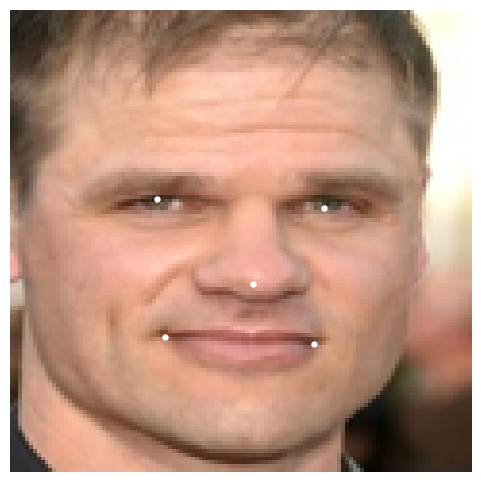

In [85]:
img = Image.open(r'F:\Codenrock\Kryptonite\data\train\images\000000\0.jpg')
resized_image = img.resize((120, 120))
plt.figure(figsize = (6, 6))
plt.imshow(resized_image)
plt.scatter(predictions[0][::2], predictions[0][1::2], s = 50, marker ='.', c='w')
plt.axis('off');

### Create table with all points for all train

In [159]:
image_path = r'F:\Codenrock\Kryptonite\data\train\images'
folder_list = os.listdir(image_path)
points_list = []

for folder in folder_list:
#for i in range(10):
    img_list = os.listdir(os.path.join(image_path, folder))
    #img_list = os.listdir(os.path.join(image_path, folder_list[i]))
    for img in img_list:
        image = Image.open(os.path.join(image_path, folder, img))
        #image = Image.open(os.path.join(image_path, folder_list[i], img))
        img_tensor = transform(image)
        img_tensor = img_tensor[None,:,:,:]
        with torch.no_grad():
            predictions = model(img_tensor.to(device)).detach().cpu().numpy()
        points_list.append([folder_list[i], img, predictions[0]]) 

In [160]:
len(points_list)

97733

In [161]:
points_df = pd.DataFrame(points_list, columns = ['folder', 'image', 'points_coords'])
points_df

,folder,image,points_coords
0,000009,0.jpg,"[37.65738, 48.57553, 81.08883, 50.833454, 62.7..."
1,000009,1.jpg,"[37.275158, 48.25361, 83.95568, 53.713425, 69...."
2,000009,2.jpg,"[44.17786, 55.864662, 76.323784, 56.149075, 61..."
3,000009,3.jpg,"[43.097603, 54.864468, 75.22729, 55.91571, 53...."
4,000009,4.jpg,"[38.348625, 49.030525, 81.22635, 51.208786, 65..."
...,...,...,...
97728,000009,4.jpg,"[44.95878, 56.689804, 74.34803, 58.092888, 62...."
97729,000009,5.jpg,"[39.819405, 48.61409, 82.77229, 50.86878, 60.7..."
97730,000009,6.jpg,"[44.609898, 56.11462, 74.44125, 56.50863, 58.6..."
97731,000009,7.jpg,"[38.252754, 50.269165, 82.282524, 49.745277, 6..."


In [162]:
points_df.to_csv('points_df', index = False)

In [169]:
fld_lst = []
for folder in folder_list:
    img_list = os.listdir(os.path.join(image_path, folder))
    for img in img_list:
        fld_lst.append(folder) 

In [175]:
len(fld_lst)

97733

In [183]:
points_df = pd.read_csv('points_df')
points_df

,folder,image,points_coords
0,9,0.jpg,[37.65738 48.57553 81.08883 50.833454 62.71...
1,9,1.jpg,[37.275158 48.25361 83.95568 53.713425 69.49...
2,9,2.jpg,[44.17786 55.864662 76.323784 56.149075 61.57...
3,9,3.jpg,[43.097603 54.864468 75.22729 55.91571 53.44...
4,9,4.jpg,[38.348625 49.030525 81.22635 51.208786 65.21...
...,...,...,...
97728,9,4.jpg,[44.95878 56.689804 74.34803 58.092888 62.74...
97729,9,5.jpg,[39.819405 48.61409 82.77229 50.86878 60.77...
97730,9,6.jpg,[44.609898 56.11462 74.44125 56.50863 58.63...
97731,9,7.jpg,[38.252754 50.269165 82.282524 49.745277 61.94...


In [185]:
points_df['folder'] = fld_lst
points_df

,folder,image,points_coords
0,000000,0.jpg,[37.65738 48.57553 81.08883 50.833454 62.71...
1,000000,1.jpg,[37.275158 48.25361 83.95568 53.713425 69.49...
2,000000,2.jpg,[44.17786 55.864662 76.323784 56.149075 61.57...
3,000000,3.jpg,[43.097603 54.864468 75.22729 55.91571 53.44...
4,000000,4.jpg,[38.348625 49.030525 81.22635 51.208786 65.21...
...,...,...,...
97728,009999,4.jpg,[44.95878 56.689804 74.34803 58.092888 62.74...
97729,009999,5.jpg,[39.819405 48.61409 82.77229 50.86878 60.77...
97730,009999,6.jpg,[44.609898 56.11462 74.44125 56.50863 58.63...
97731,009999,7.jpg,[38.252754 50.269165 82.282524 49.745277 61.94...


In [205]:
import re
coords_np = np.array(points_df['points_coords'])
coords_divided = []
for i in range(len(coords_np)):
    coords = re.findall(r'[\d\.]+', coords_np[i])
    coords_divided.append([float(coords[0]) * 224 / 120, float(coords[1]) * 224 / 120, float(coords[2]) * 224 / 120, float(coords[3]) * 224 / 120, float(coords[4]) * 224 / 120, float(coords[5]) * 224 / 120, float(coords[6]) * 224 / 120, float(coords[7]) * 224 / 120, float(coords[8]) * 224 / 120, float(coords[9]) * 224 / 120])

In [209]:
coords_divided[0]

[70.29377600000001,
 90.67432266666667,
 151.365816,
 94.88911413333334,
 117.0718024,
 131.80727466666667,
 74.36980133333333,
 157.59191466666664,
 146.27537866666668,
 160.92494133333332]

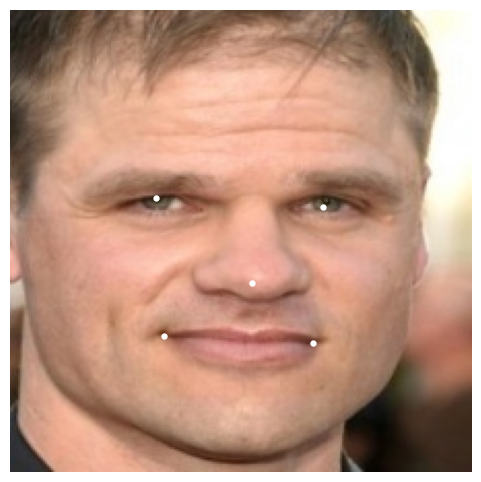

In [211]:
img = Image.open(r'F:\Codenrock\Kryptonite\data\train\images\000000\0.jpg')
plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.scatter(coords_divided[0][::2], coords_divided[0][1::2], s = 50, marker ='.', c='w')
plt.axis('off');

In [213]:
coord_cols = ['left_eye_x', 'left_eye_y',  'right_eye_x', 'right_eye_y', 'nose_x', 'nose_y', 'left_mouth_x', 'left_mouth_y', 'right_mouth_x', 'right_mouth_y']

In [215]:
points_df[coord_cols] = coords_divided
points_df

,folder,image,points_coords,left_eye_x,left_eye_y,right_eye_x,right_eye_y,nose_x,nose_y,left_mouth_x,left_mouth_y,right_mouth_x,right_mouth_y
0,000000,0.jpg,[37.65738 48.57553 81.08883 50.833454 62.71...,70.293776,90.674323,151.365816,94.889114,117.071802,131.807275,74.369801,157.591915,146.275379,160.924941
1,000000,1.jpg,[37.275158 48.25361 83.95568 53.713425 69.49...,69.580295,90.073405,156.717269,100.265060,129.728629,124.721979,76.691813,157.875909,140.767685,165.875864
2,000000,2.jpg,[44.17786 55.864662 76.323784 56.149075 61.57...,82.465339,104.280702,142.471063,104.811607,114.939235,136.771507,85.158050,159.949795,136.963997,160.577387
3,000000,3.jpg,[43.097603 54.864468 75.22729 55.91571 53.44...,80.448859,102.413674,140.424275,104.375992,99.766897,126.291629,80.780504,162.513932,129.175480,164.378685
4,000000,4.jpg,[38.348625 49.030525 81.22635 51.208786 65.21...,71.584100,91.523647,151.622520,95.589734,121.725819,131.650176,73.129187,152.414759,145.182651,155.334909
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97728,009999,4.jpg,[44.95878 56.689804 74.34803 58.092888 62.74...,83.923056,105.820967,138.782989,108.440058,117.127845,125.220872,92.171281,163.416848,132.105251,165.387115
97729,009999,5.jpg,[39.819405 48.61409 82.77229 50.86878 60.77...,74.329556,90.746301,154.508275,94.955056,113.437548,124.841995,76.014400,163.639840,147.937645,166.875557
97730,009999,6.jpg,[44.609898 56.11462 74.44125 56.50863 58.63...,83.271810,104.747291,138.957000,105.482776,109.451029,135.194591,87.223640,164.572893,132.917841,165.264867
97731,009999,7.jpg,[38.252754 50.269165 82.282524 49.745277 61.94...,71.405141,93.835775,153.594045,92.857850,115.630346,137.028752,73.463271,152.329632,155.821337,150.818192


In [219]:
final_points = points_df[['folder', 'image', 'left_eye_x', 'left_eye_y', 'right_eye_x', 'right_eye_y', 'nose_x', 'nose_y', 
                          'left_mouth_x', 'left_mouth_y', 'right_mouth_x', 'right_mouth_y']].copy()
final_points

,folder,image,left_eye_x,left_eye_y,right_eye_x,right_eye_y,nose_x,nose_y,left_mouth_x,left_mouth_y,right_mouth_x,right_mouth_y
0,000000,0.jpg,70.293776,90.674323,151.365816,94.889114,117.071802,131.807275,74.369801,157.591915,146.275379,160.924941
1,000000,1.jpg,69.580295,90.073405,156.717269,100.265060,129.728629,124.721979,76.691813,157.875909,140.767685,165.875864
2,000000,2.jpg,82.465339,104.280702,142.471063,104.811607,114.939235,136.771507,85.158050,159.949795,136.963997,160.577387
3,000000,3.jpg,80.448859,102.413674,140.424275,104.375992,99.766897,126.291629,80.780504,162.513932,129.175480,164.378685
4,000000,4.jpg,71.584100,91.523647,151.622520,95.589734,121.725819,131.650176,73.129187,152.414759,145.182651,155.334909
...,...,...,...,...,...,...,...,...,...,...,...,...
97728,009999,4.jpg,83.923056,105.820967,138.782989,108.440058,117.127845,125.220872,92.171281,163.416848,132.105251,165.387115
97729,009999,5.jpg,74.329556,90.746301,154.508275,94.955056,113.437548,124.841995,76.014400,163.639840,147.937645,166.875557
97730,009999,6.jpg,83.271810,104.747291,138.957000,105.482776,109.451029,135.194591,87.223640,164.572893,132.917841,165.264867
97731,009999,7.jpg,71.405141,93.835775,153.594045,92.857850,115.630346,137.028752,73.463271,152.329632,155.821337,150.818192


In [221]:
final_points.to_csv('points_df', index = False)

In [217]:
points_df.columns

Index(['folder', 'image', 'points_coords', 'left_eye_x', 'left_eye_y',
       'right_eye_x', 'right_eye_y', 'nose_x', 'nose_y', 'left_mouth_x',
       'left_mouth_y', 'right_mouth_x', 'right_mouth_y'],
      dtype='object')